# KNN Classification

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn
%matplotlib inline 

## Dataset: forge dataset

 An example of a synthetic two-class classification dataset. which has two features.

X.shape: (26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


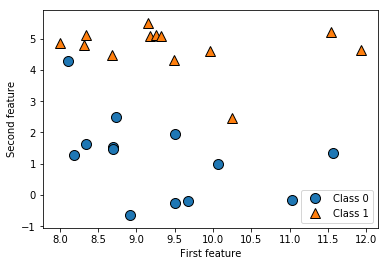

In [23]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4) 
plt.xlabel("First feature") 
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### KNN on Forge Dataset 

In [24]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors= 3)

clf.fit(X_train, y_train)
print('Test set predictions: ', clf.predict(X_test))
print('Test set accuracy: ', clf.score(X_test, y_test))

Test set predictions:  [1 0 1 0 1 0 0]
Test set accuracy:  0.8571428571428571


### Visualization of the decision boundary for one, three and nine neighbors: 

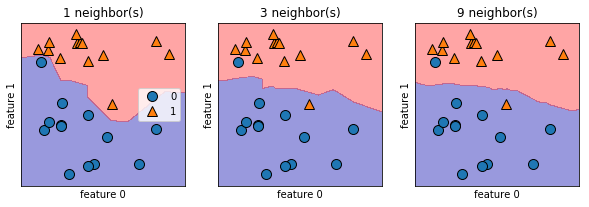

In [22]:
fig, axes = plt.subplots(1,3, figsize = (10, 3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors= n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y , ax= ax)
    ax.set_title(str(n_neighbors) + ' neighbor(s)')
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend(loc = 'best'

## Breast Cancer Dataset

In [29]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=66)

training_accuracy = [] 
test_accuracy = [] 
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:  
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)  
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy   
    test_accuracy.append(clf.score(X_test, y_test))
    

### Visualizing Results

As you can see, KNN overfits with lower neighbors and underfits with higher neighbors

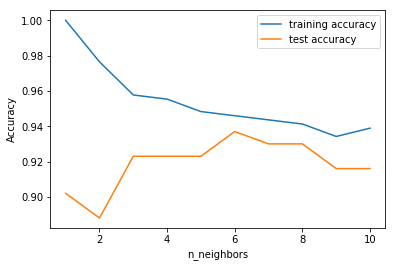

In [32]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy") 
plt.xlabel("n_neighbors") 
plt.legend();

# KNN Regression

## MakeWave Dataset

Synthetic wave dataset. The wave dataset has a single input feature and a continuous target variable (or response) that we want to model. 

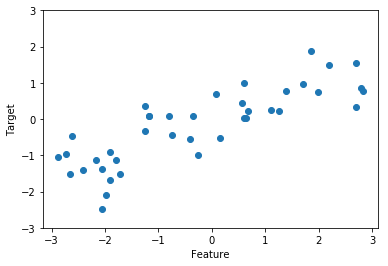

In [35]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3) 
plt.xlabel("Feature")
plt.ylabel("Target");

In [38]:
from sklearn.neighbors import KNeighborsRegressor

# split the wave dataset into a training and a test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3 
reg = KNeighborsRegressor(n_neighbors=3) 
# fit the model using the training data and training targets 
reg.fit(X_train, y_train)
print('Test set predictions:', reg.predict(X_test))
print('Test set R^2: ', reg.score(X_test, y_test))

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2:  0.8344172446249604
